# Tuto Amazon RDS

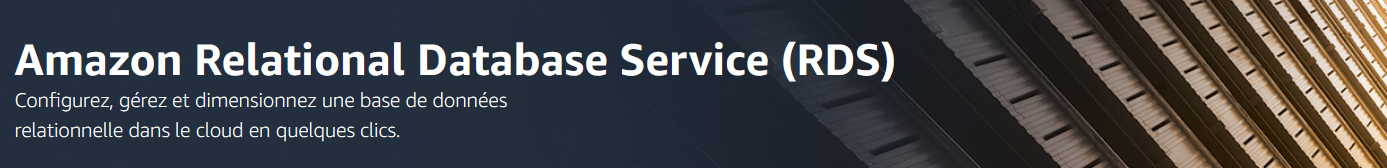

*Amazon Relational Database Service* (RDS) est un service de la suite *Amazon Web Service* (AWS) qui sert à bâtir, manipuler et mettre à l'échelle des bases de données relationnelles dans le *cloud* Amazon.


## Intérêt

* Beaucoup de tâches administratives lourdes sont automatisées.

* RDS est un DBaaS (Database as a Service). Il permet de mettre en place la base de données sans avoir à installer l'infrastructure nécessaire sur le serveur.

* Plusieurs logiciels de DBB sont supportés, dont MySQL, PostgreSQL, MariaDB, Oracle, etc... Ils sont automatiquement mis à jour par Amazon.

* Le choix de serveurs optimisés est déjà fait au préalable.

* La sauvegarde et la restauration des données sont faciles et rapides.

* La puissance du serveur peut être augmentée si nécessaire.

* Une BDD peut être copiée en temps réel sur plusieurs serveurs (en réplication), utile si le volume de données augmente.

## Offre gratuite / Payante

#### Offre gratuite

Chez AWS il existe 3 offres gratuites

-12 Mois Gratuit

-toujours Gratuit

-Essais

Il n'y a pas de différence entre ces 3 offres pour le service Amazon RDS

Niveau gratuit d'AWS pour Amazon RDS

    750 heures d'utilisation d'instances de base de données db.t2.micro Amazon RDS mono-AZ, exécutant MySQL, MariaDB, PostgreSQL, Oracle BYOL ou SQL Server (Aurora DB n'est pas disponible dans l'offre gratuite), soit un nombre d'heures suffisant pour exécuter une instance DB en continu chaque mois
    20 Go de stockage de base de données à usage général (SSD)
    20 Go de stockage de données de récupération pour vos sauvegardes automatisées des bases de données et tout instantané de base de données réalisé par l'utilisateur

En plus de ces services, AWS Management Console est disponible sans frais supplémentaires pour aider à construire et à gérer les instances DB sur Amazon RDS.

Le niveau gratuit d'AWS est à disposition pendant 12 mois à compter de la date de création du compte AWS. Une fois le délai d'utilisation gratuit expiré, ou si l'utilisation de l'application dépasse les limites du niveau d'utilisation gratuit, vous payez tout simplement les frais standard applicables en fonction de votre utilisation.

Il n'existe pas d'offre gratuite au delà des 12 mois / 750 heures d'utilisations du service

#### Offre payante

Amazone RDS permet de TOUT personnaliser, mais il y a cependant 2 groupes de tarification:

Les instances à la demandes qui permettent de payer à l'utilisation

Les instances réservés qui permettent de "s'abonner" pour une durée de 2 ou 3 ans, le prix des instances réservés est globalement moins cher que celui des instances à la demande

## Base de données, instance et cluster

* Une base de données (BDD) présente des données sous une forme plus ou moins structurées en les reliant.

* Une instance est un des environnements virtuels qui prennent en charge les opération sur la base de donnée. C'est l'unité de base du système AWS.

* Un cluster est un groupe d'instances plus le volume qui stocke les données et que les instances exploitent.

## Lancer un serveur RDS

    Rechercher "RDS" dans la barre de recherche d'AWS. La page d'accueil :

![](RDS1.png)

Sur les nouvelles versions, la création d'instance de BDD se fait sur ``Bases de données`` > ``Créer une base de données``, et non plus sur ``Instances``. On a ensuite le choix du type de création et du logiciel de BDD utilisé :

![](RDS2.png)

Amazon Aurora est optimisé pour RDS mais n'est pas disponible dans la version gratuite de RDS. Pour ce tutoriel, choisissons MysQL.

On a ensuite le choix du modèle, ici Offre Gratuite (les deux autres options sont payantes) :

![](RDS3.png)

Le nom (obligatoirement unique) de la base, le nom de l'utilisateur principal et le mot de passe :

![](RDS4.png)

On peut laisser les options par défaut pour les fonctionalités suivantes :

* Taille d'instance DB : La classe de la taille de BDD, à modifier pour de plus grands jeux de données.

* Les options de stockage : Idem.

* Disponibilité et durabilité : L'option de créer une instance de recours pour éviter les pertes (non disponible en offre gratuite).

* Options de connectivité : VPC, accès public ou non, sécurité, port IP à utiliser, etc... Sauf cas particulier, il est fortement recommandé d'éviter de rendre sa base publique ! Le choix du VPC (Virtual Private Cloud) est également important : les bases qui partagent le même VPC peuvent échanger entre elles.

![](vpc.png)

* Authentification de base de données : Options pour n'avoir que le mot de passe, ou le mot de passe plus un identifiant.

* Configuration supplémentaire : Fréquence des sauvegardes (défaut 7 jours), options de maintenance, etc...

Une dernière fenêtre vous donne les coûts mensuels estimés. Sous l'offre gratuite, elle indique à la place les modalités de cette offre et sa durée (12 mois). Vérifiez bien que vous n'avez pas choisi une autre option !

On peut finalement créer la BDD. Elle apparaît alors dans notre liste d'instances de BDD, et on peut accéder à son récapitulatif en cliquant dessus.

![](db1.png)

Un détail important est le point de terminaison, qui va nous indiquer où retrouver cette BDD.

## Sauvegarde et restauration

Une sauvegarde automatique a lieu régulièrement (tous les 7 jours par défaut). Il est toutefois possible de faire une sauvegarde manuelle, appelée instantané. On en crée comme ci-dessous, en sélectionant bien la BDD et en donnant un nom à l'instantané :

![](instantane.png)

Il est possible de restaurer un instantané depuis le menu Instantanés :

![](instantane2.png)

Mais on peut aussi partir de la page de la BDD pour restaurer à un moment précis, 

![](restauration.png)

![](restauration2.png)

## Connexion à la DataBase

Afin de se connecter rapidement et facilement à notre instance de Database, il faut effectuer plusieurs opérations. Tout d'abord, il faut aller dans les options de l'instance de DataBase (cliquer sur l'engrenage) et choisir Security groups pour affecter un groupe à l'instance.

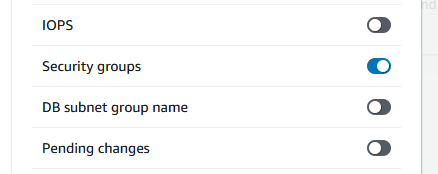

En s'aidant de la barre de recherche, on peut retrouver les options des groupes de sécurité rapidement.

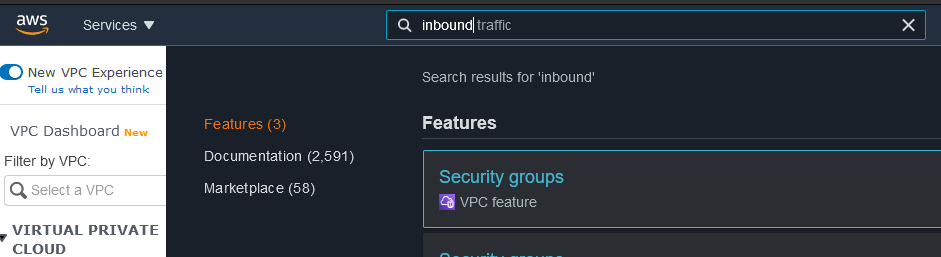

On choisit la règle de sécurité qui est affectée à l'instance de notre BDD.

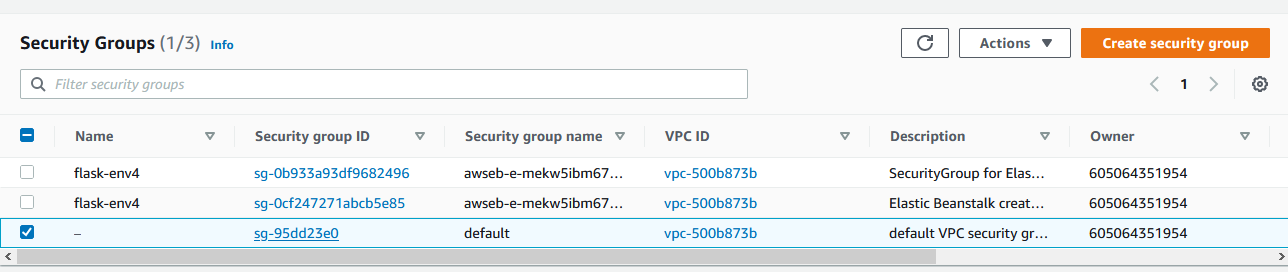

En choisissant All traffic pour le type de traffic, il faut tout de même whitelister l'IP de la machine avec laquelle on va vouloir se connecter à la base.

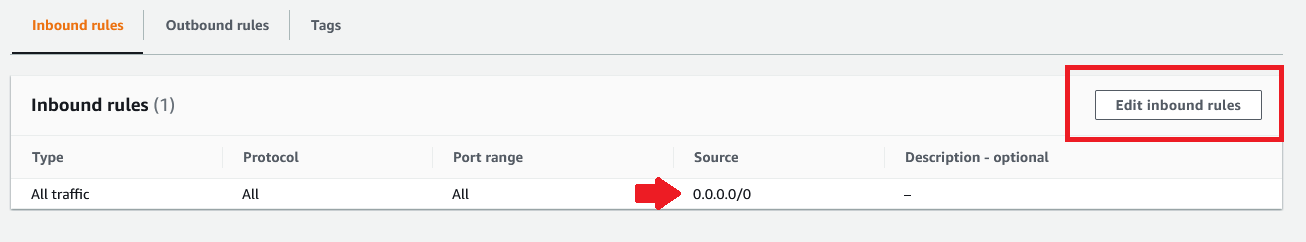

On ajoute notre IP et on sauvegarde.

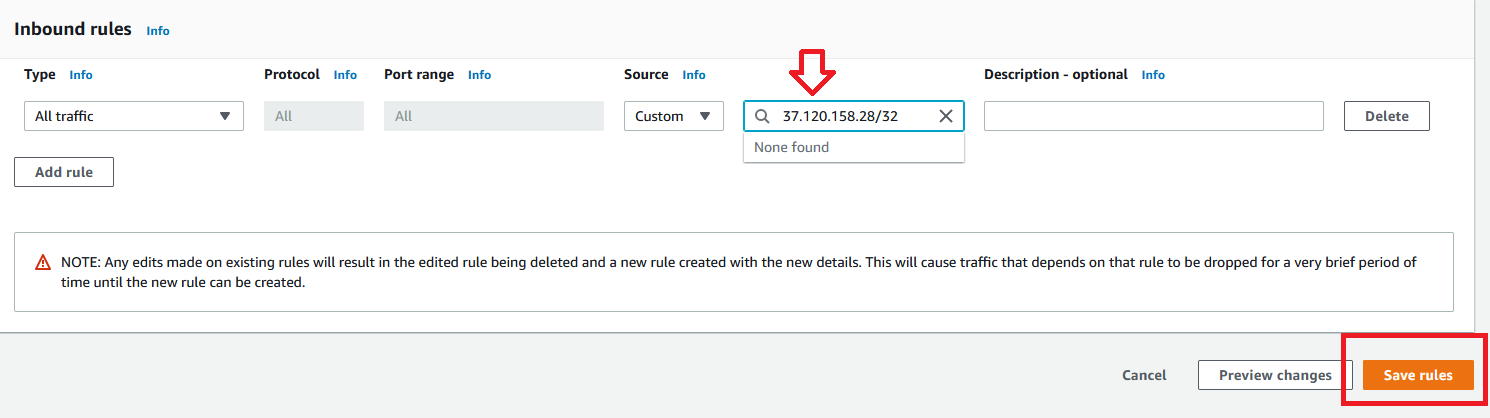

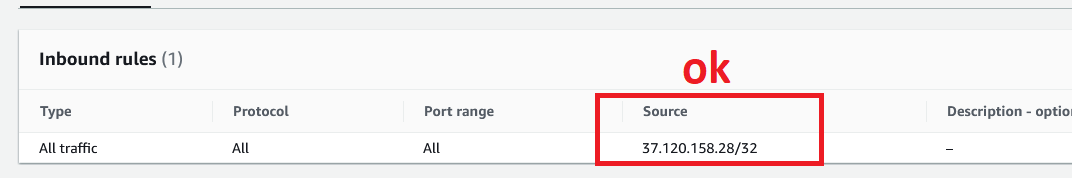

La règle inbound a été modifiée, on peut maintenant se connecter à notre instance de Database via notre machine et un outil MySQL compatible. Par exemple, on peut utiliser MySQL Workbench qui dispose d'une interface graphique qui permet de paramétrer rapidement la connexion au endpoint de notre instance.

https://www.mysql.com/fr/products/workbench/

Une dernière étape pour pouvoir requêter comme on le souhaite sur notre base est de nous assurer que le endpoint que nous renseignons dans notre client mysql pour nous connecter est bien lié à une instance de base qui permet l'écriture et non pas seulement la lecture :

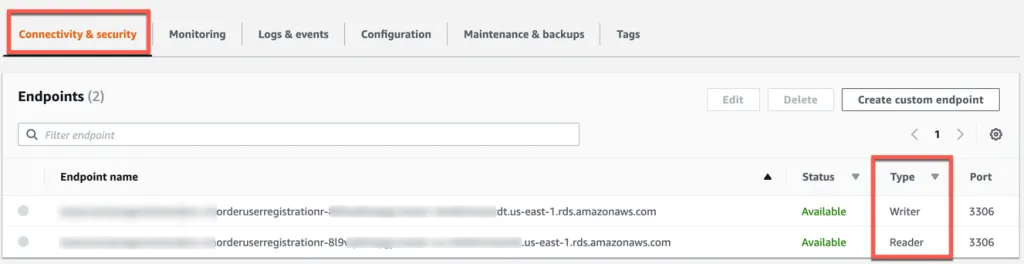

**Remarque :** dans les faits, il existe beaucoup de types de règles pour le paramétrage du traffic autorisé pour notre instance. Une pratique courante est de créer un tunnel SSH pour se connecter de manière plus sécurisée. Pour ce faire, voir le tutoriel suivant : https://help.data.world/hc/en-us/articles/360042882294-Connecting-to-an-AWS-RDS-database-through-an-SSH-tunnel

## Stopper un serveur RDS

![L'Etat de l'instance devient "stopping" puis "stopped".](stop_rds.png)

Arrêter une instance de BDD diminue les coûts d'utilisation payante d'AWS. Les données déjà stockées sont conservées, mais pas celles sur la RAM. Les actions en attente sont également supprimées.

Attention : Une sauvegarde en instantanée n'est pas automatiquement faite, et l'instance redémarrera automatiquement pour faire la sauvegarde automatique tous les 7 jours.

Une BDD en arrêt ne peut pas être modifiée, que ce soit ses données, sa structure ou ses paramètres.

**Bravo, vous savez à présent gérer votre base de donnée sur le cloud amazon, amusez-vous bien !**